In [11]:
import os, shutil
import glob
import numpy as np
import PIL
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import BatchNormalization
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
from sklearn import metrics

# Make the Necessary Directories to Store Data

In [ ]:
# RUN THIS ONCE 
def mkdir_imgs():
    base_dir = 'C:/Users/micha/Documents/CPSC_courses/CPSC393/Final/Data'
    os.mkdir(base_dir)
    train_dir = os.path.join(base_dir, 'train')
    os.mkdir(train_dir)
    validation_dir = os.path.join(base_dir, 'validation')
    os.mkdir(validation_dir)
    test_dir = os.path.join(base_dir, 'test')
    os.mkdir(test_dir)

    # Training
    train_cans_dir = os.path.join(train_dir, 'AluCan')
    os.mkdir(train_cans_dir)
    train_glass_dir = os.path.join(train_dir, 'Glass')
    os.mkdir(train_glass_dir)
    train_hdpem_dir = os.path.join(train_dir, 'HDPEM')
    os.mkdir(train_hdpem_dir)
    train_pet_dir = os.path.join(train_dir, 'PET')
    os.mkdir(train_pet_dir)

    # Validation
    validation_cans_dir = os.path.join(validation_dir, 'AluCan')
    os.mkdir(validation_cans_dir)
    validation_glass_dir = os.path.join(validation_dir, 'Glass')
    os.mkdir(validation_glass_dir)
    validation_hdpem_dir = os.path.join(validation_dir, 'HDPEM')
    os.mkdir(validation_hdpem_dir)
    validation_pet_dir = os.path.join(validation_dir, 'PET')
    os.mkdir(validation_pet_dir)

    # Test
    test_cans_dir = os.path.join(test_dir, 'AluCan')
    os.mkdir(test_cans_dir)
    test_glass_dir = os.path.join(test_dir, 'Glass')
    os.mkdir(test_glass_dir)

    test_hdpem_dir = os.path.join(test_dir, 'HDPEM')
    os.mkdir(test_hdpem_dir)
    test_pet_dir = os.path.join(test_dir, 'PET')
    os.mkdir(test_pet_dir)

# Copy images to respective folders

In [ ]:
def copy_imgs_to_folders():
### TRAIN ### 
    original_dataset_dir = 'C:/Users/micha/Desktop/rawimgs_copy'
    base_dir = 'C:/Users/micha/Documents/CPSC_courses/CPSC393/Final/Data'
    train_dir = os.path.join(base_dir, 'train')
    validation_dir = os.path.join(base_dir, 'validation')
    test_dir = os.path.join(base_dir, 'test')
    can_src = os.path.join(original_dataset_dir, 'AluCan')
    for file in random.sample(glob.glob(can_src + '/*.jpg'), 700):
        shutil.copy(file, train_cans_dir)

    glass_src = os.path.join(original_dataset_dir, 'Glass')
    for file in random.sample(glob.glob(glass_src + '/*.jpg'), 900):
        shutil.copy(file, train_glass_dir)

    hdpem_src = os.path.join(original_dataset_dir, 'HDPEM')
    for file in random.sample(glob.glob(hdpem_src + '/*.jpg'), 700):
        src = file
        shutil.copy(file, train_hdpem_dir)

    pet_src = os.path.join(original_dataset_dir, 'PET')
    for file in random.sample(glob.glob(pet_src + '/*.jpg'), 1100):
        src = file
        shutil.copy(file, train_pet_dir)


    ### VALIDATION ###
    can_src = os.path.join(original_dataset_dir, 'AluCan')
    for file in random.sample(glob.glob(can_src + '/*.jpg'), 250):
        shutil.copy(file, validation_cans_dir)

    glass_src = os.path.join(original_dataset_dir, 'Glass')
    for file in random.sample(glob.glob(glass_src + '/*.jpg'), 250):
        shutil.copy(file, validation_glass_dir)

    hdpem_src = os.path.join(original_dataset_dir, 'HDPEM')
    for file in random.sample(glob.glob(hdpem_src + '/*.jpg'), 250):
        shutil.copy(file, validation_hdpem_dir)

    pet_src = os.path.join(original_dataset_dir, 'PET')
    for file in random.sample(glob.glob(pet_src + '/*.jpg'), 250):
        shutil.copy(file, validation_pet_dir)


    #### TEST ###
    can_src = os.path.join(original_dataset_dir, 'AluCan')
    for file in random.sample(glob.glob(can_src + '/*.jpg'), 50):
        shutil.copy(file, test_cans_dir)

    glass_src = os.path.join(original_dataset_dir, 'Glass')
    for file in random.sample(glob.glob(glass_src + '/*.jpg'), 50):
        shutil.copy(file, test_glass_dir)

    hdpem_src = os.path.join(original_dataset_dir, 'HDPEM')
    for file in random.sample(glob.glob(hdpem_src + '/*.jpg'), 50):
        shutil.copy(file, test_hdpem_dir)

    pet_src = os.path.join(original_dataset_dir, 'PET')
    for file in random.sample(glob.glob(pet_src + '/*.jpg'), 50):
        shutil.copy(file, test_pet_dir)



In [ ]:
# Run this once
mkdir_imgs()
copy_imgs_to_folders()

# Initialize directory variable names

In [7]:
# RUN this everytime except first time.
original_dataset_dir = 'C:/Users/micha/Desktop/rawimgs'
base_dir = 'C:/Users/micha/Documents/CPSC_courses/CPSC393/Final/Data'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')


# Training
train_cans_dir = os.path.join(train_dir, 'AluCan')
train_glass_dir = os.path.join(train_dir, 'Glass')
train_hdpem_dir = os.path.join(train_dir, 'HDPEM')
train_pet_dir = os.path.join(train_dir, 'PET')

# Validation
validation_cans_dir = os.path.join(validation_dir, 'AluCan')
validation_glass_dir = os.path.join(validation_dir, 'Glass')
validation_hdpem_dir = os.path.join(validation_dir, 'HDPEM')
validation_pet_dir = os.path.join(validation_dir, 'PET')

# Test
test_cans_dir = os.path.join(test_dir, 'AluCan')
test_glass_dir = os.path.join(test_dir, 'Glass')
test_hdpem_dir = os.path.join(test_dir, 'HDPEM')
test_pet_dir = os.path.join(test_dir, 'PET')


In [ ]:
def mkdir_new_img():
    new_dataset_dir = 'C:/Users/micha/Downloads/new_data'
    
    # Make the folders
    cans_dir = os.path.join(new_dataset_dir, "Cans")
    os.mkdir(cans_dir)
    glass_dir = os.path.join(new_dataset_dir, "Glass")
    os.mkdir(glass_dir)
    pet_dir = os.path.join(new_dataset_dir, "PET")
    os.mkdir(pet_dir)
    

def convert_arr_to_image_folders(imgs, labels):
    new_dataset_dir = 'C:/Users/micha/Downloads/new_data'
    
    # Make the folders
    cans_dir = os.path.join(new_dataset_dir, "Cans")
    glass_dir = os.path.join(new_dataset_dir, "Glass")
    pet_dir = os.path.join(new_dataset_dir, "PET")
    
    for i in range(len(labels)):
        image = PIL.Image.fromarray(x[i], "RGB")
        
        # maybe include crushed cans...
        if labels[i,0] == 2 or labels[i,0] == 3:
            image.save(cans_dir + "/cans_{}.jpg".format(i))
            pass
            
        elif labels[i,0] == 1:
            image.save(glass_dir + "/glass_{}.jpg".format(i))
    
        elif labels[i,0] == 4:
            image.save(pet_dir + "/pet_{}.jpg".format(i))
            
def move_new_images_to_folders():
### TRAIN ### 
    new_dataset_dir = 'C:/Users/micha/Downloads/new_data'
    base_dir = 'C:/Users/micha/Documents/CPSC_courses/CPSC393/Final/Data'
    train_dir = os.path.join(base_dir, 'train')
    validation_dir = os.path.join(base_dir, 'validation')
    test_dir = os.path.join(base_dir, 'test')


    # Training
    train_cans_dir = os.path.join(train_dir, 'AluCan')
    train_glass_dir = os.path.join(train_dir, 'Glass')
    train_hdpem_dir = os.path.join(train_dir, 'HDPEM')
    train_pet_dir = os.path.join(train_dir, 'PET')

    # Validation
    validation_cans_dir = os.path.join(validation_dir, 'AluCan')
    validation_glass_dir = os.path.join(validation_dir, 'Glass')
    validation_hdpem_dir = os.path.join(validation_dir, 'HDPEM')
    validation_pet_dir = os.path.join(validation_dir, 'PET')

    # Test
    test_cans_dir = os.path.join(test_dir, 'AluCan')
    test_glass_dir = os.path.join(test_dir, 'Glass')
    test_hdpem_dir = os.path.join(test_dir, 'HDPEM')
    test_pet_dir = os.path.join(test_dir, 'PET')

    new_can_src = os.path.join(new_dataset_dir, 'Cans')

    new_glass_src = os.path.join(new_dataset_dir, 'Glass')

    new_pet_src = os.path.join(new_dataset_dir, 'PET')


    ### VALIDATION ###
    for file in random.sample(glob.glob(new_can_src + '/*.jpg'), 250):
        shutil.copy(file, validation_cans_dir)

    for file in random.sample(glob.glob(new_glass_src + '/*.jpg'), 250):
        shutil.move(file, validation_glass_dir)

    for file in random.sample(glob.glob(new_pet_src + '/*.jpg'), 250):
        shutil.move(file, validation_pet_dir)


    #### TEST ###
    for file in random.sample(glob.glob(new_can_src + '/*.jpg'), 50):
        shutil.move(file, test_cans_dir)

    for file in random.sample(glob.glob(new_glass_src + '/*.jpg'), 50):
        shutil.move(file, test_glass_dir)

    for file in random.sample(glob.glob(new_pet_src + '/*.jpg'), 50):
        shutil.move(file, test_pet_dir)

In [ ]:
# Run this once
mkdir_new_img()
convert_arr_to_image_folders(x, y)
move_new_images_to_folders()

# Set memory growth to true and configure the dataset for performance

In [8]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available:", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

# AUTOTUNE = tf.data.AUTOTUNE
# train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
# val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Num GPUs Available: 1


# New Convet that includes dropout

In [9]:
def model_builder():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu',
    input_shape=(128, 128, 3)))
    model.add(BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(BatchNormalization())
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(BatchNormalization())
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(BatchNormalization())
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(BatchNormalization())
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(layers.Dense(4, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy',
    optimizer=optimizers.RMSprop(lr=1e-3),
    metrics=['acc'])
    return model
   

In [12]:
model = model_builder()
model = tf.keras.models.load_model("weights.best.hdf5")
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_9 (Batch (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 63, 63, 32)        128       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_11 (Batc (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 30, 30, 64)       

# Setting up a data augmentation configuration

In [13]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)
val_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    classes=['AluCan', 'Glass', 'HDPEM', 'PET'],
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical')
validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    classes=['AluCan', 'Glass', 'HDPEM', 'PET'],
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical')

Found 7900 images belonging to 4 classes.
Found 1750 images belonging to 4 classes.


In [14]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (32, 128, 128, 3)
labels batch shape: (32, 4)


# Train the model

In [ ]:
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

history = model.fit(
    train_generator,
    steps_per_epoch=7900 // 32,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=1750 // 32,
    callbacks=callbacks_list,
    verbose = 2)

In [15]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(50,50))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [16]:
# Credit to Deep lizard for this function
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot Confusion Matrix and evaluate model based on test data

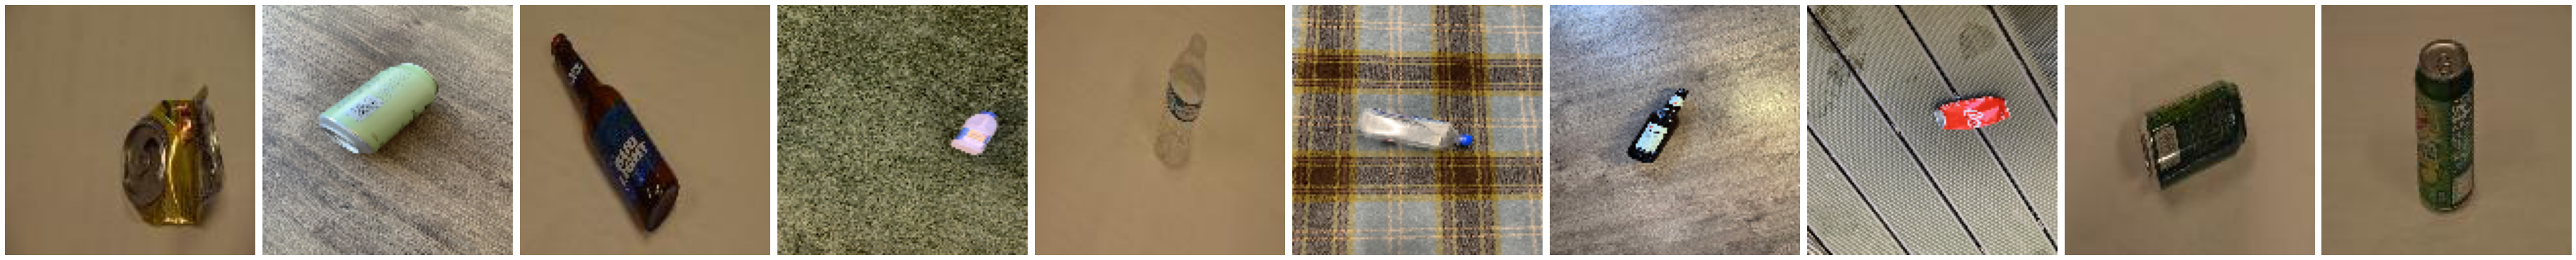

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


In [17]:
test_imgs, test_labels = next(validation_generator)
plotImages(test_imgs)
print(test_labels[:10])

In [18]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    classes=['AluCan', 'Glass', 'HDPEM', 'PET'],
    target_size=(128, 128),
    batch_size=10,
    class_mode='categorical',
    shuffle=False)


predictions = model.predict(x=test_generator, steps=len(test_generator), verbose=2)
predictions = np.round(predictions)
cm = confusion_matrix(y_true=test_generator.classes, y_pred=np.argmax(predictions, axis=-1))

Found 350 images belonging to 4 classes.
35/35 - 1s


{'AluCan': 0, 'Glass': 1, 'HDPEM': 2, 'PET': 3}
Confusion matrix, without normalization
[[95  4  1  0]
 [ 0 99  0  1]
 [ 0  1 49  0]
 [ 1  1  0 98]]


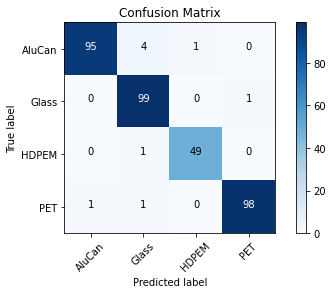

In [19]:
print(test_generator.class_indices)
cm_plot_labels = ['AluCan', 'Glass', 'HDPEM', 'PET']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [21]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    classes=['AluCan', 'Glass', 'HDPEM', 'PET'],
    target_size=(128, 128),
    batch_size=10,
    class_mode='categorical',
    shuffle=False)

loss, acc = model.evaluate(test_generator, steps=len(test_generator), verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))


Found 350 images belonging to 4 classes.
35/35 - 2s - loss: 0.0518 - acc: 0.9743
Restored model, accuracy: 97.43%


In [22]:
class_labels = list(validation_generator.class_indices.keys()) 
report = metrics.classification_report(test_generator.classes, np.argmax(predictions, axis=-1), target_names=class_labels)
print(report)    

              precision    recall  f1-score   support

      AluCan       0.99      0.95      0.97       100
       Glass       0.94      0.99      0.97       100
       HDPEM       0.98      0.98      0.98        50
         PET       0.99      0.98      0.98       100

    accuracy                           0.97       350
   macro avg       0.98      0.97      0.98       350
weighted avg       0.97      0.97      0.97       350



# Plot Confusion Matrix and evaluate model based on validation data

In [24]:
val_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    classes=['AluCan', 'Glass', 'HDPEM', 'PET'],
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle = False)

predictions = model.predict(x=validation_generator, steps=len(validation_generator), verbose=2)
predictions = np.round(predictions)
cm = confusion_matrix(y_true=validation_generator.classes, y_pred=np.argmax(predictions, axis=-1))
y = validation_generator.classes

Found 1750 images belonging to 4 classes.
55/55 - 8s


{'AluCan': 0, 'Glass': 1, 'HDPEM': 2, 'PET': 3}
Confusion matrix, without normalization
[[487   5   6   2]
 [  1 492   7   0]
 [  0   2 248   0]
 [  3   8   5 484]]


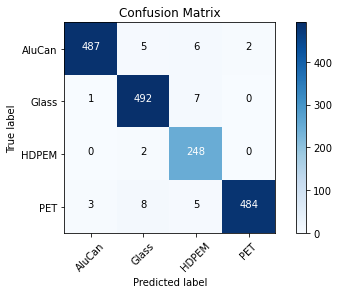

In [25]:
print(validation_generator.class_indices)
cm_plot_labels = ['AluCan', 'Glass', 'HDPEM', 'PET']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [29]:
loss, acc = model.evaluate(validation_generator, steps=len(validation_generator), verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

55/55 - 8s - loss: 0.0706 - acc: 0.9777
Restored model, accuracy: 97.77%


In [30]:
class_labels = list(validation_generator.class_indices.keys()) 
report = metrics.classification_report(validation_generator.classes, np.argmax(predictions, axis=-1), target_names=class_labels)
print(report)   

              precision    recall  f1-score   support

      AluCan       0.99      0.97      0.98       500
       Glass       0.97      0.98      0.98       500
       HDPEM       0.93      0.99      0.96       250
         PET       1.00      0.97      0.98       500

    accuracy                           0.98      1750
   macro avg       0.97      0.98      0.98      1750
weighted avg       0.98      0.98      0.98      1750



# Print validation and training accuracies per epoch

In [28]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()